<a href="https://colab.research.google.com/github/MinhQuangQu/test/blob/main/Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('Project data.csv', encoding='latin1')

In [ ]:
total_nulls = df.isnull().sum()
per_nulls = (total_nulls/len(df))*100
print(f"No.of nulls in each column are:\n{per_nulls}")

No.of nulls in each column are:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


[]

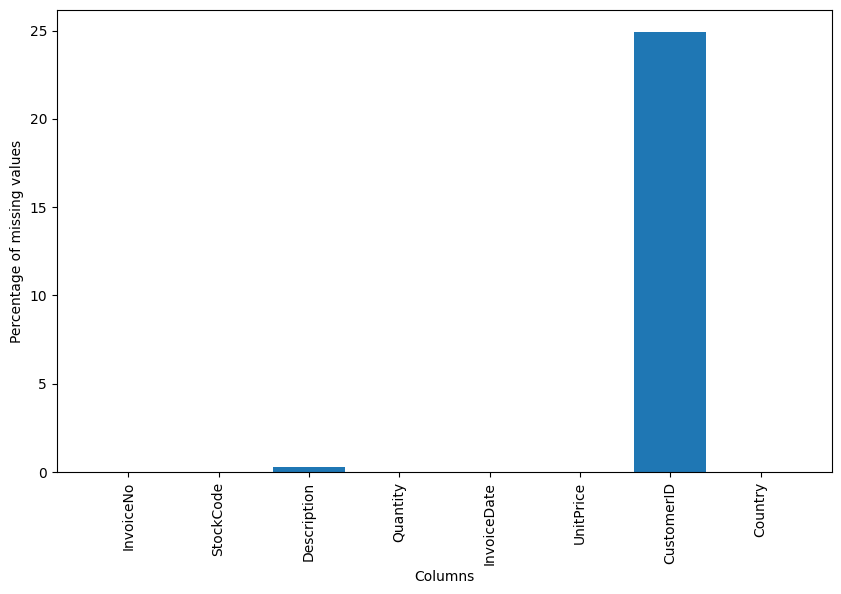

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(per_nulls.index, per_nulls)
plt.xticks(rotation = 90)
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.plot()

In [ ]:
df.dropna(subset = 'CustomerID', inplace = True)

In [ ]:
len(df)

406829

In [ ]:
duplicates = df[df.duplicated(subset = ['InvoiceNo', 'StockCode', 'Quantity'], keep = False)]

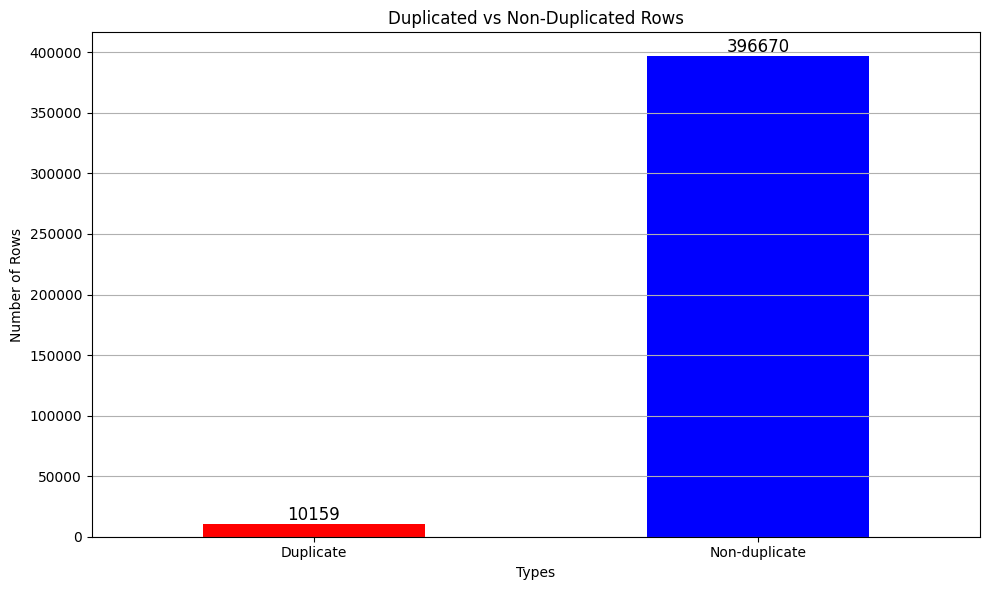

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dup_count = pd.Series(
    {
        'Duplicate': len(duplicates),
        'Non-duplicate': len(df) - len(duplicates)
    }
)

plt.figure(figsize=(10,6))
ax = dup_count.plot(kind='bar', color=['red', 'blue'])

# Thêm số trên mỗi cột
for i, value in enumerate(dup_count):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Duplicated vs Non-Duplicated Rows')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.ylabel('Number of Rows')
plt.xlabel('Types')
plt.tight_layout()
plt.show()


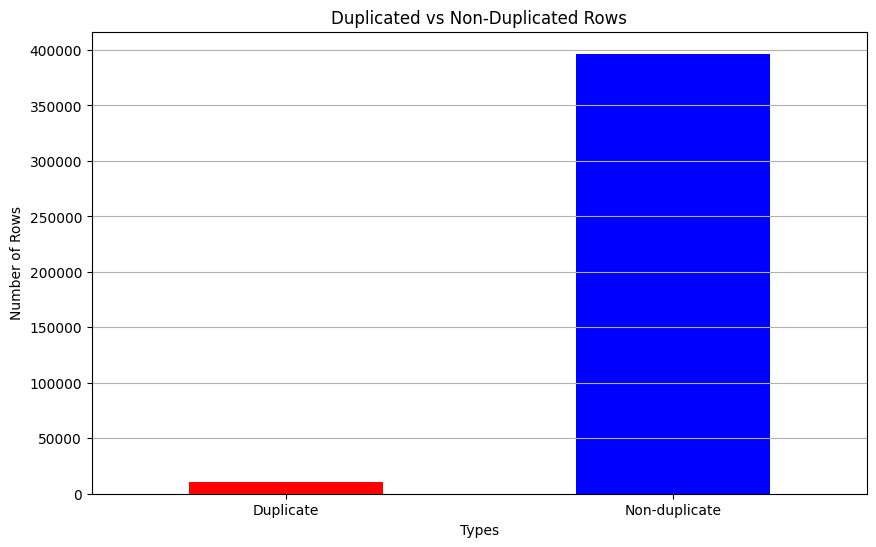

In [ ]:
dup_count = pd.Series(
    {'Duplicate': len(duplicates),
    'Non-duplicate': len(df) - len(duplicates)
    }
)
plt.figure(figsize = (10,6))
dup_count.plot(kind = 'bar', color = ['red', 'blue'])
plt.title('Duplicated vs Non-Duplicated Rows')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.ylabel('Number of Rows')
plt.xlabel('Types')
plt.show()

In [ ]:
print(f"Data before dropping duplicates: {len(df)}")
df = df.drop_duplicates(subset=["InvoiceNo", "StockCode", "Quantity"], keep="first")
print(f"Data after dropping duplicates:  {len(df)}")

Data before dropping duplicates: 406829
Data after dropping duplicates:  401548


Total number of cancelled orders: 8905


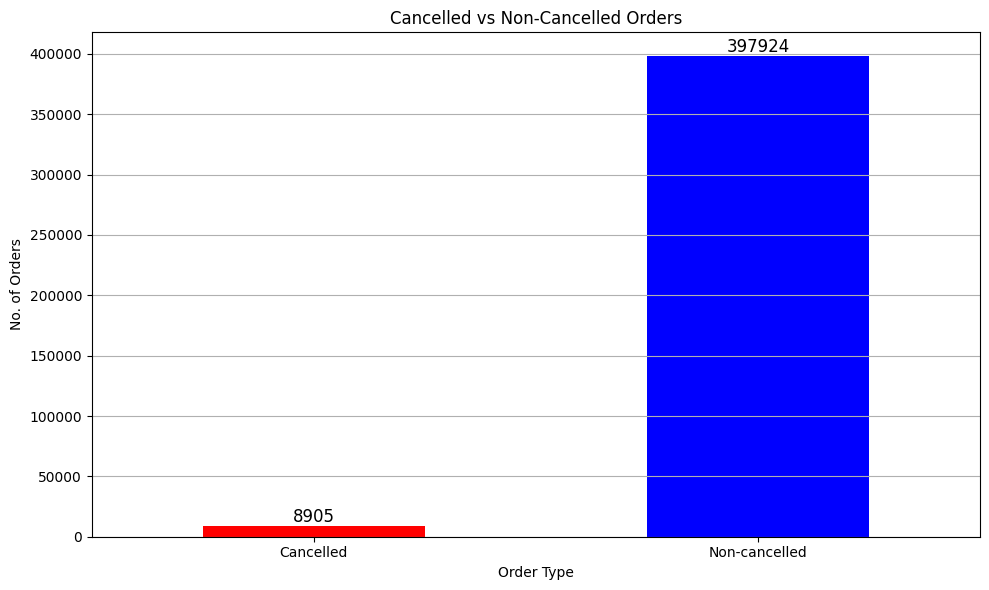

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cancel = df['InvoiceNo'].str.startswith('C')
print(f"Total number of cancelled orders: {cancel.sum()}")

cancel_order = pd.Series({
    'Cancelled': cancel.sum(),
    'Non-cancelled': len(df) - cancel.sum()
})

plt.figure(figsize=(10,6))
ax = cancel_order.plot(kind='bar', color=['red', 'blue'])

# Thêm số liệu trên từng cột
for i, value in enumerate(cancel_order):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.title("Cancelled vs Non-Cancelled Orders")
plt.xlabel("Order Type")
plt.ylabel("No. of Orders")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Total number of cancelled orders: 8841


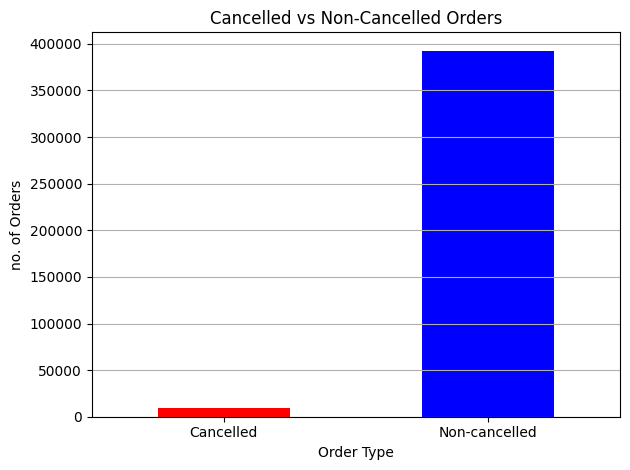

In [ ]:
cancel = df['InvoiceNo'].str.startswith('C')
print(f"Total number of cancelled orders: {cancel.sum()}")

cancel_order = pd.Series({
    'Cancelled': cancel.sum(),
    'Non-cancelled':len(df)-cancel.sum()
})
cancel_order.plot(kind='bar',color=['red','blue'])
plt.title("Cancelled vs Non-Cancelled Orders")
plt.xlabel("Order Type")
plt.ylabel("no. of Orders")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df['Total_Price'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df['Total_Price']

,Total_Price
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


In [ ]:
len(df)

401548

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].mask(df['InvoiceNo'].str.startswith('C'), np.nan)
df.dropna(subset = 'InvoiceNo', inplace= True)

In [ ]:
len(df)

392707

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df['InvoiceDate'].head())

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


In [ ]:
df['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Total_Price,0


In [ ]:
df['ToTalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df['ToTalPrice'].round(2)

,ToTalPrice
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60
